# NAO comparison

The notebook wants to compare results from teleconnections analysis of NAO from ERA5 with index evaluated by NCAR, available at https://climatedataguide.ucar.edu/sites/default/files/2022-10/nao_station_monthly.txt

Additionally we want to compare the teleconnection analysis also with the same analysis done with cdo python bindings.

## Data loading

Load NCAR data and NAO index from teleconnections analysis

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tools
import xarray as xr
from cdotesting import *

diagname  = 'teleconnections'
machine   = 'wilma'

namelist = tools.load_namelist(diagname)
config   = tools.load_config(machine)

# Loading different data
ncarfile = 'data/nao_station_monthly.txt'

infile   = config['teleconnections']['output']
infile  += '/NAO_indx.nc'

cdofile  = config['teleconnections']['output']
cdofile += '/cdo_nao.nc'

In [8]:
nao = xr.open_dataarray(infile)
cdo_nao = xr.open_dataset(cdofile)['msl']

ncar_nao = np.genfromtxt(ncarfile, skip_header=2)

year = ncar_nao[:, 0]
month_data = ncar_nao[:, 1:]
time = xr.cftime_range(start=str(int(year[0])),periods=12*len(year),freq='M',calendar='standard')
month_data = month_data.reshape(-1)
ncar_nao = xr.DataArray(month_data, coords=[time], dims=['time'], name='monthly_data')

## Plot two dataset together

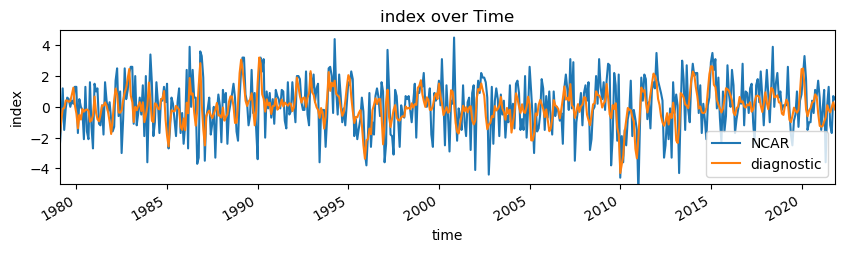

In [9]:
import datetime
import cftime

time_vals = np.array(time.values)

# Convert to datetime objects
datetimes = [np.datetime64(t).astype(datetime.datetime) for t in time_vals]

# Plot with matplotlib
fig = plt.figure(figsize=(10,2))
plt.plot(datetimes, ncar_nao.values,label='NCAR')

plt.xlim(datetime.datetime(1979, 1, 31, 0, 0),datetime.datetime(2021, 10, 31, 0, 0))
plt.ylim(-5,+5)

nao.plot(label='diagnostic')
plt.legend()
plt.title(nao.name + ' over Time')
plt.show()


## NAO libraries vs cdo comparison

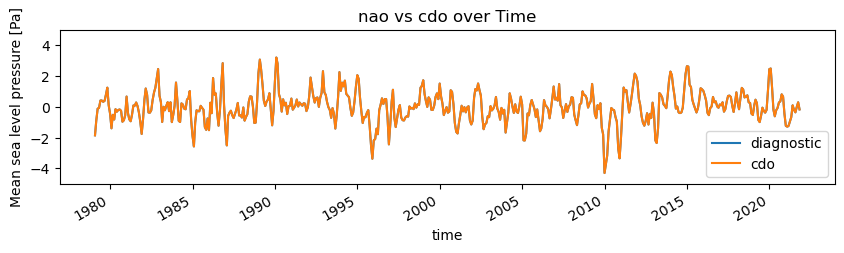

In [10]:
# Plot with matplotlib
fig = plt.figure(figsize=(10,2))

#plt.xlim(datetime.datetime(1979, 1, 31, 0, 0),datetime.datetime(2021, 10, 31, 0, 0))
plt.ylim(-5,+5)

nao.plot(label='diagnostic')
cdo_nao.plot(label='cdo')
plt.legend()
plt.title('nao vs cdo over Time')
plt.show()

## 3 dataset and diagnostics together

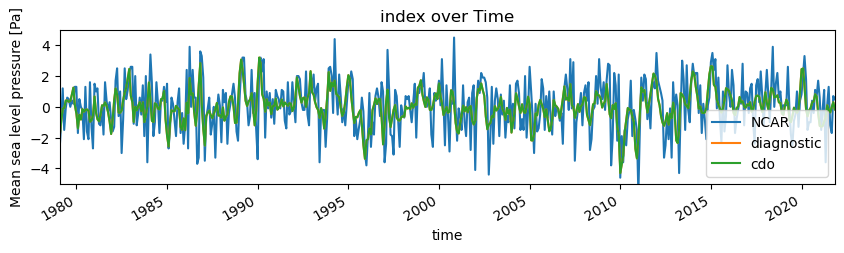

In [11]:
# Plot with matplotlib
fig = plt.figure(figsize=(10,2))
plt.plot(datetimes, ncar_nao.values,label='NCAR')

plt.xlim(datetime.datetime(1979, 1, 31, 0, 0),datetime.datetime(2021, 10, 31, 0, 0))
plt.ylim(-5,+5)

nao.plot(label='diagnostic')
cdo_nao.plot(label='cdo')
plt.legend()
plt.title(nao.name + ' over Time')
plt.show()